# Prova prática de Visão Computacional

1. Seja a imagem satelital com ruído de fundo salt & pepper (PSNR=25dB), inserida na pasta compartilhada denominada airport_gray_noisy.png (pasta Questão 1). Implemente um código com alguma técnica para remoção parcial do ruído apresentado.

In [1]:
!unzip -j 'Questão 1-20240328T201710Z-001.zip'

Archive:  Questão 1-20240328T201710Z-001.zip
  inflating: airport_gray_noisy.PNG  
  inflating: airport.PNG             
  inflating: airport_gray.PNG        


In [2]:
!ls

 airport_gray_noisy.PNG  'Questão 1-20240328T201710Z-001.zip'
 airport_gray.PNG	  Resolucao1.ipynb
 airport.PNG


#### Vamos dar uma pequena olhada nas imagens que foram passadas.

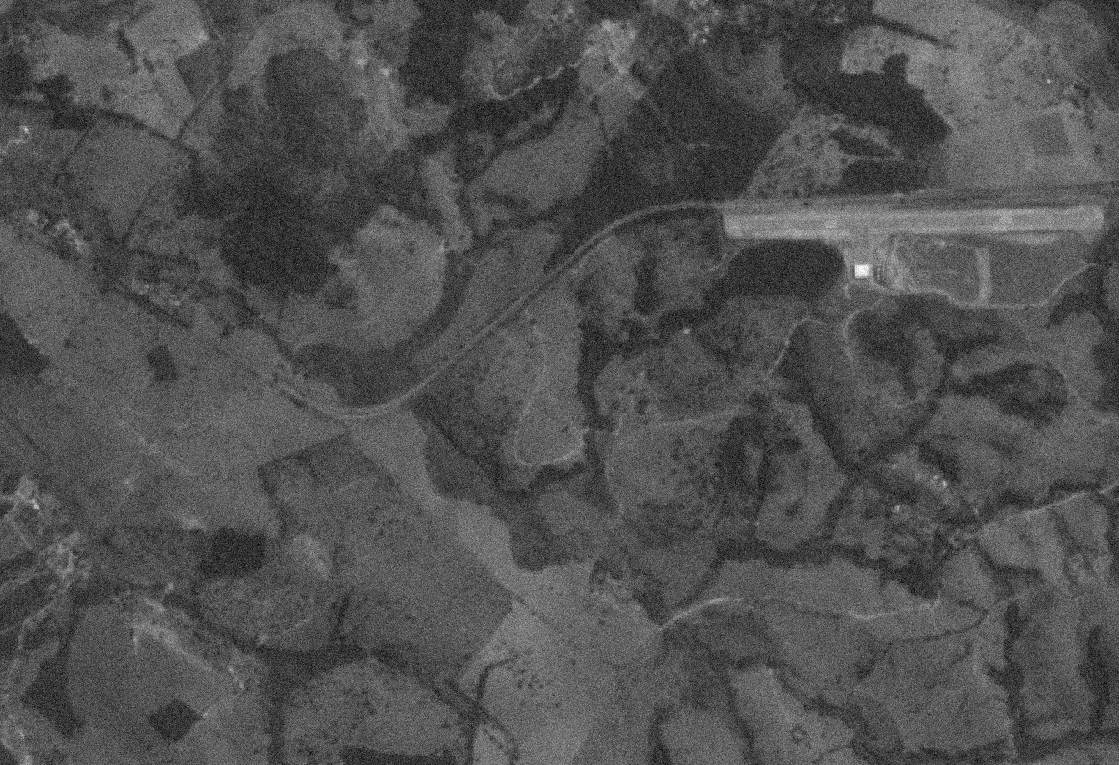

In [3]:
from IPython.display import Image
Image(filename='airport_gray_noisy.PNG') 

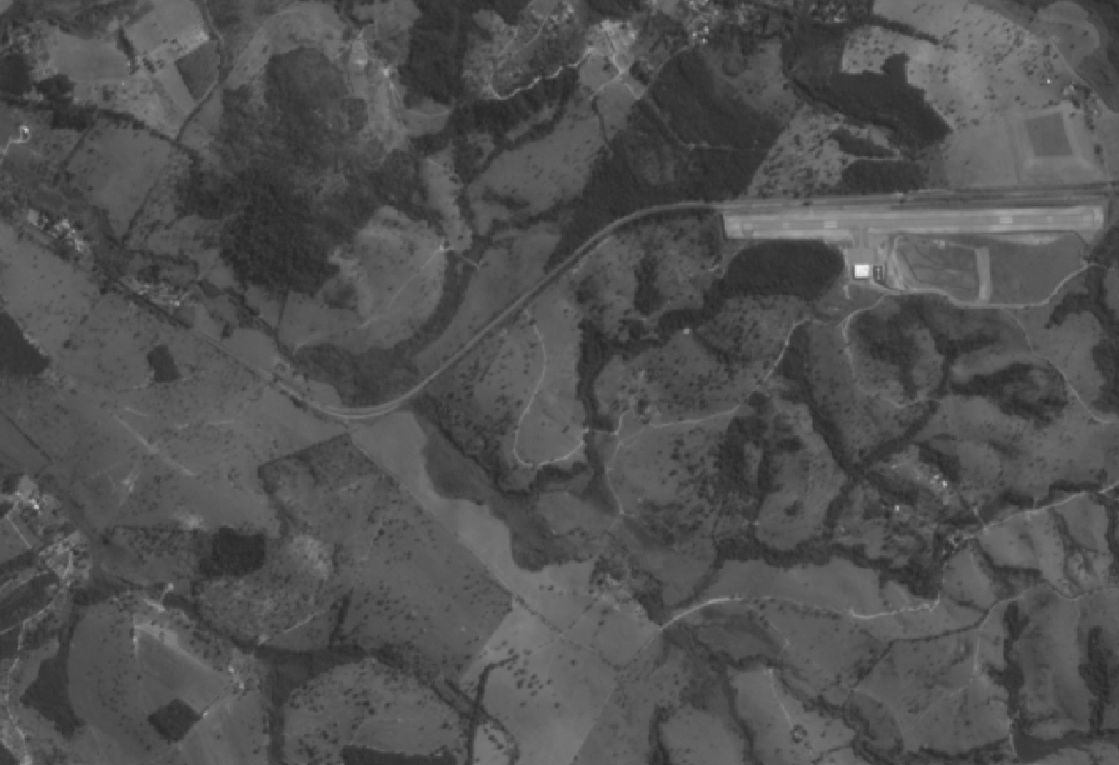

In [4]:
from IPython.display import Image
Image(filename='airport_gray.PNG') 

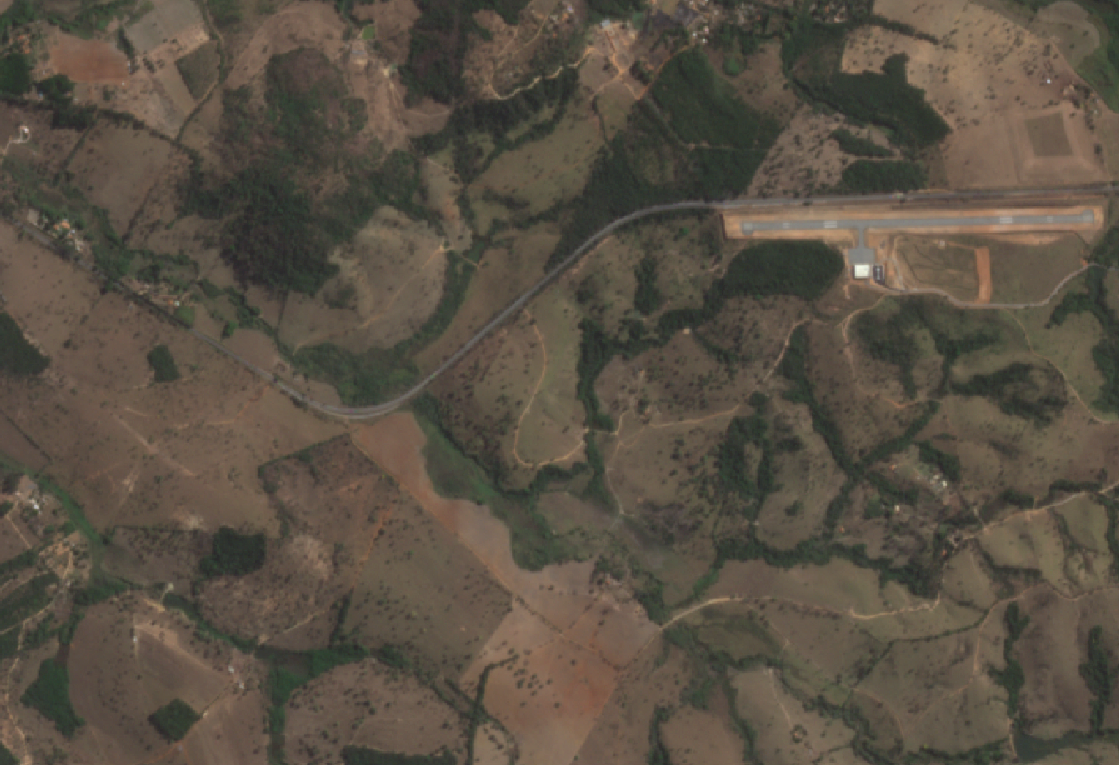

In [5]:
from IPython.display import Image
Image(filename='airport.PNG') 

## OpenCV

Uma biblioteca muito utilizada para realizar trabalhos de visão computacional é a OpenCV. Além de ser livre para uso e multiplataforma, ela já possui várias funções para o tratamento de imagens, como remoção de ruídos.

- Primeiramente, vamos instalar a biblioteca.

In [6]:
!conda install -c conda-forge opencv --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /home/ymarca/anaconda3/envs/fiesc-prova

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    bzip2-1.0.8                |       h7f98852_4         484 KB  conda-forge
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    cairo-1.16.0               |       hb05425b_5         1.2 MB
    eigen-3.4.0                |       h4bd325d_0         1.2 MB  conda-forge
    ffmpeg-4.2.2               |       h20bf706_0    

bzip2-1.0.8          | 484 KB    |                                       |   0% 



x264-1!157.20191217  | 922 KB    |                                       |   0% 




glib-tools-2.78.4    | 115 KB    |                                       |   0% 





ffmpeg-4.2.2         | 59.6 MB   |                                       |   0% 






lame-3.100           | 496 KB    |                                       |   0% 







libvpx-1.7.0         | 1.2 MB    |                                       |   0% 








libopus-1.3.1        | 255 KB    |                                       |   0% 









icu-58.2             | 22.6 MB   |                                       |   0% 










libopenblas-0.3.20   | 10.1 MB   |                                       |   0% 











glib-2.78.4          | 508 KB    |                                       |   0% 












cairo-1.16.0         | 1.2 MB    |                                       |   0% 













libedit-3.1.20230828 

libopenblas-0.3.20   | 10.1 MB   | ####1                                 |  11% 





ffmpeg-4.2.2         | 59.6 MB   | #####3                                |  14% 

opencv-4.6.0         | 32.4 MB   | #############6                        |  37% 









icu-58.2             | 22.6 MB   | ######1                               |  17% 












cairo-1.16.0         | 1.2 MB    | 5                                     |   1% 










libopenblas-0.3.20   | 10.1 MB   | ######3                               |  17% 





ffmpeg-4.2.2         | 59.6 MB   | ######2                               |  17% 

opencv-4.6.0         | 32.4 MB   | ###############9                      |  43% 









icu-58.2             | 22.6 MB   | #######6                              |  21% 












cairo-1.16.0         | 1.2 MB    | #############################1        |  79% 










libopenblas-0.3.20   | 10.1 MB   | ########4                             |  23% 





ffmpeg-4.2.2         | 59.6 MB

icu-58.2             | 22.6 MB   | ########################              |  65% 










libopenblas-0.3.20   | 10.1 MB   | ############################1         |  76% 





ffmpeg-4.2.2         | 59.6 MB   | #############1                        |  35% 

opencv-4.6.0         | 32.4 MB   | ################################9     |  89% 









icu-58.2             | 22.6 MB   | #########################2            |  68% 



















libgfortran5-13.2.0  | 1.4 MB    | 4                                     |   1% 










libopenblas-0.3.20   | 10.1 MB   | #############################7        |  80% 









icu-58.2             | 22.6 MB   | ###########################           |  73% 



















libgfortran5-13.2.0  | 1.4 MB    | #############                         |  35% 





ffmpeg-4.2.2         | 59.6 MB   | #############5                        |  37% 

opencv-4.6.0         | 32.4 MB   | ##################################    |  92% 









icu-58.2    

In [7]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [8]:
!conda list | grep cv2

In [9]:
!conda list

# packages in environment at /home/ymarca/anaconda3/envs/fiesc-prova:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             5.1                       1_gnu  
blas                      1.0                    openblas  
bzip2                     1.0.8                h7f98852_4    conda-forge
c-ares                    1.19.1               h5eee18b_0  
ca-certificates           2024.2.2             hbcca054_0    conda-forge
cairo                     1.16.0               hb05425b_5  
cyrus-sasl                2.1.28               h52b45da_1  
dbus                      1.13.18              hb2f20db_0  
eigen                     3.4.0                h4bd325d_0    conda-forge
expat                     2.5.0                h6a678d5_0  
ffmpeg                    4.2.2                h20bf706_0  
fontconfig                2.14.1               h4c34cd2_2  
freetype                  2.10.4          

#### A biblioteca e suas dependencias foram instaladas, contudo é necessário reinicializar o kernel do Python para carregar as novas bibliotecas.

In [1]:
import cv2

In [2]:
# Inicializar variaveis com base na imagem
airport_gray_noisy = cv2.imread('airport_gray_noisy.PNG', 0)
airport_gray = cv2.imread('airport_gray.PNG', 0)

In [3]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

#### matplotlib é uma biblioteca muito útil para gerar gráficos e visualizar imagens. Vamos incluí-la também no environment.

In [6]:
!conda install matplotlib --quiet --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /home/ymarca/anaconda3/envs/fiesc-prova

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pillow-10.2.0              |   py38h5eee18b_0         766 KB
    ------------------------------------------------------------
                                           Total:         766 KB

The following NEW packages will be INSTALLED:

  brotli             pkgs/main/linux-64::brotli-1.0.9-h5eee18b_7 
  brotli-bin         pkgs/main/linux-64::brotli-bin-1.0.9-h5eee18b_7 
  contourpy          pkgs/main/linux-64::contourpy-1.0.5-py38hdb19cb5_0 
  cycler             pkgs/main/noarch::cycler-0.11.0-pyhd3eb1b0_0 
  fonttools          pkgs/main/noarch::fonttools-4.25.0-pyhd3eb1b0_0 
  kiwisolver         pkgs/main/linux-64::kiwisolver-1.4.4-py38h6a678d5_0 
  lcms2              pk

#### Reiniciar o kernel.

In [1]:
import matplotlib.pyplot as plt
import cv2

# Inicializar variaveis com base na imagem
airport_gray_noisy = cv2.imread('airport_gray_noisy.PNG', 0)
airport_gray = cv2.imread('airport_gray.PNG', 0)

#### De acordo com o enunciado da questão, o ruído salt & pepper possui uma relação sinal-ruído (PSNR) de 25 dB. Como temos a imagem original e a imagem com ruído, podemos calcular o PSNR para verificar esse valor.

Text(0.5, 1.0, 'Ruído salt & pepper')

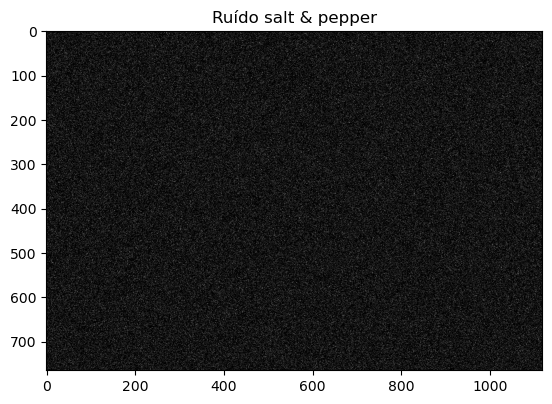

In [2]:
diff = cv2.subtract(airport_gray_noisy, airport_gray)
plt.imshow(diff, cmap='gray')
plt.title("Ruído salt & pepper")

## Relação sinal-ruído de pico (PSNR)

Para calcular o PSNR a partir do MSE (Mean Square Error) entre as duas imagens:

$PSNR = 10 \cdot \log_{10}\left(\frac{{\text{Intensidade Maxima dos Pixels}^2}}{{MSE}}\right)$


In [3]:
import numpy as np
print(f"Intensidade maxima da imagem original = {np.max(airport_gray)}")

Intensidade maxima da imagem original = 242


#### Vamos calcular o PSNR entre a imagem original e com ruido para verificar o valor de 25dB

In [4]:
# MSE
diff = np.square(airport_gray - airport_gray_noisy)
mse_value = np.mean(diff)
print(f"MSE={mse_value}")

MSE=76.39124218051832


In [5]:
# PSNR
psnr = 10 * np.log10(242**2 / mse_value)
print(f"PSNR={psnr}")

PSNR=28.84587159912519


#### O valor não corresponde ao passado no enunciado, provavelmente teremos que normalizar as imagens.

In [6]:
airport_gray_norm = airport_gray.astype(np.float16) / np.max(airport_gray)
airport_gray_noisy_norm = airport_gray_noisy.astype(np.float16) / np.max(airport_gray_noisy)

In [7]:
print(f"Intensidade maxima da imagem original normalizada = {np.max(airport_gray_norm)}")

Intensidade maxima da imagem original normalizada = 1.0


In [8]:
# MSE
diff = np.square(airport_gray_norm  - airport_gray_noisy_norm)
mse_value = np.mean(diff)
print(f"MSE={mse_value}")

# PSNR
psnr = 10 * np.log10(1.0 / mse_value)
print(f"PSNR={psnr}")

MSE=0.0035457611083984375
PSNR=24.502905278437442


#### Ainda não chegamos ao valor de 25 dB, mas creio que estamos próximos o suficiente. Este valor é importante para podermos avaliar a eficácia do nosso método de remoção de ruído.

### OpenCV ```fastNlMeansDenoising```
Agora, vamos utilizar a função de remoção de ruído do OpenCV para imagens em grayscale


https://docs.opencv.org/3.4/d1/d79/group__photo__denoise.html#ga4c6b0031f56ea3f98f768881279ffe93

```
fastNlMeansDenoising(       InputArray 	src,
                            OutputArray 	dst,
                            float 	h = 3,
                            int 	templateWindowSize = 7,
                            int 	searchWindowSize = 21      ) -> dst	
```


- ```src```: Input 8-bit 1-channel, 2-channel, 3-channel or 4-channel image.
- ```dst```: Output image with the same size and type as src.
- ```templateWindowSize```: Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
- ```searchWindowSize```: Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels.
- ```h```: Parameter regulating filter strength. Big h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise.

Text(0.5, 1.0, 'Remoção de ruído salt & pepper')

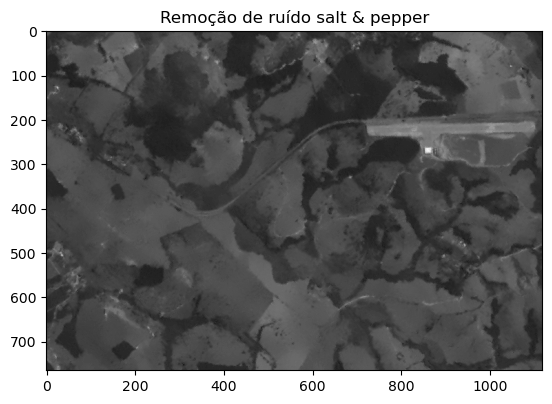

In [19]:
denoised_airport = cv2.fastNlMeansDenoising(airport_gray_noisy, None, 10, 7, 31)
plt.imshow(denoised_airport, cmap='gray')
plt.title("Remoção de ruído salt & pepper")

#### Aparentemente, utilizando a função ```fastNlMeansDenoising``` foi possível remover o ruído da imagem. Agora, podemos utilizar o PSNR calculado anteriormente para verificar a eficácia do método do OpenCV. Neste caso, quanto maior o valor de PSNR, melhor será a eficácia do método.

In [20]:
# Normalizar
denoised_airport_norm = denoised_airport.astype(np.float16) / np.max(denoised_airport)

# MSE
diff = np.square(airport_gray_norm  - denoised_airport_norm)
mse_value = np.mean(diff)
print(f"MSE={mse_value}")

# PSNR
psnr = 10 * np.log10(1.0 / mse_value)
print(f"PSNR apos remocao de ruido = {psnr}")

MSE=0.0006785392761230469
PSNR apos remocao de ruido = 31.68425008859321


## Otimizar os parâmetros da função ```fastNlMeansDenoising```
Apos alguns testes mudando os parâmetros ```templateWindowSize```,```searchWindowSize``` e ```h```, podemos implementar um simple loop para encontrar o melhor conjunto de parâmetros para nosso caso utilizando o PSNR como guia da busca de otimização.
- Implementar função para calcular o PSNR.
- Atribuir para cada um dos 3 parâmetros um range de buscas.
- Rodar um loop para encontrar a melhor opção.

In [22]:
def calc_PSNR(img, img_com_ruido):
    img1 = img.astype(np.float16) / np.max(img)
    img2 = img_com_ruido.astype(np.float16) / np.max(img_com_ruido)

    # MSE
    diff = np.square(img1  - img2)
    mse_value = np.mean(diff)
    
    # PSNR
    psnr = 10 * np.log10(1.0 / mse_value)

    return psnr

# Testar funcao
print(f"PSNR apos remocao de ruido = {calc_PSNR(airport_gray, denoised_airport)}")

PSNR apos remocao de ruido = 31.68425008859321


In [28]:
# Range para cada parametro
templateWindowSize_range = [i+1 for i in range(20) if i%2==0] #only odd numbers
print(f"templateWindowSize_range={templateWindowSize_range}")
searchWindowSize_range = [i+11 for i in range(20) if i%2==0] #only odd numbers centered in 21
print(f"searchWindowSize_range={searchWindowSize_range}")
h_range = np.linspace(1,5,5)
print(f"h_range={h_range}")

templateWindowSize_range=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
searchWindowSize_range=[11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
h_range=[1. 2. 3. 4. 5.]


In [29]:
best_psnr = 0
best_params = {'templateWindowSize': None, 'searchWindowSize': None, 'h': None}

for templateWindowSize in templateWindowSize_range:
    for searchWindowSize in searchWindowSize_range:
        for h in h_range:
            denoised_airport = cv2.fastNlMeansDenoising(airport_gray_noisy, None, h, templateWindowSize, searchWindowSize)
            new_psnr = calc_PSNR(airport_gray, denoised_airport)
            if new_psnr > best_psnr:
                best_psnr = new_psnr
                best_params['templateWindowSize'] = templateWindowSize
                best_params['searchWindowSize'] = searchWindowSize
                best_params['h'] = h

print("Melhor PSNR encontrado:", best_psnr)
print("Melhores parametros correspondentes:", best_params)

Melhor PSNR encontrado: 24.90912959506708
Melhores parametros correspondentes: {'templateWindowSize': 1, 'searchWindowSize': 15, 'h': 5.0}


## Considerações finais:

- Após uma leitura mais cuidadosa do parâmetro h, acabei limitando-o em 5, pois um valor muito grande pode acabar removendo detalhes da imagem.
- O método de otimização dos parâmetros da função ```fastNlMeansDenoising``` que foi implementado é bem simplista. Contudo, essa ideia é fundamental para qualquer algoritmo de inteligência artificial. Redes neurais, por exemplo, são "treinadas" a partir de um loop simples como esse, onde existe uma função para estimar a qualidade do modelo. No nosso caso simplista, utilizamos PSNR, contudo outros meios para avaliarmos a eficacia do método pode ser utilizado.
- Vamos então apresentar as imagens com ruído e após a remoção do ruído com os parâmetros encontrados para termos uma comparação visual.

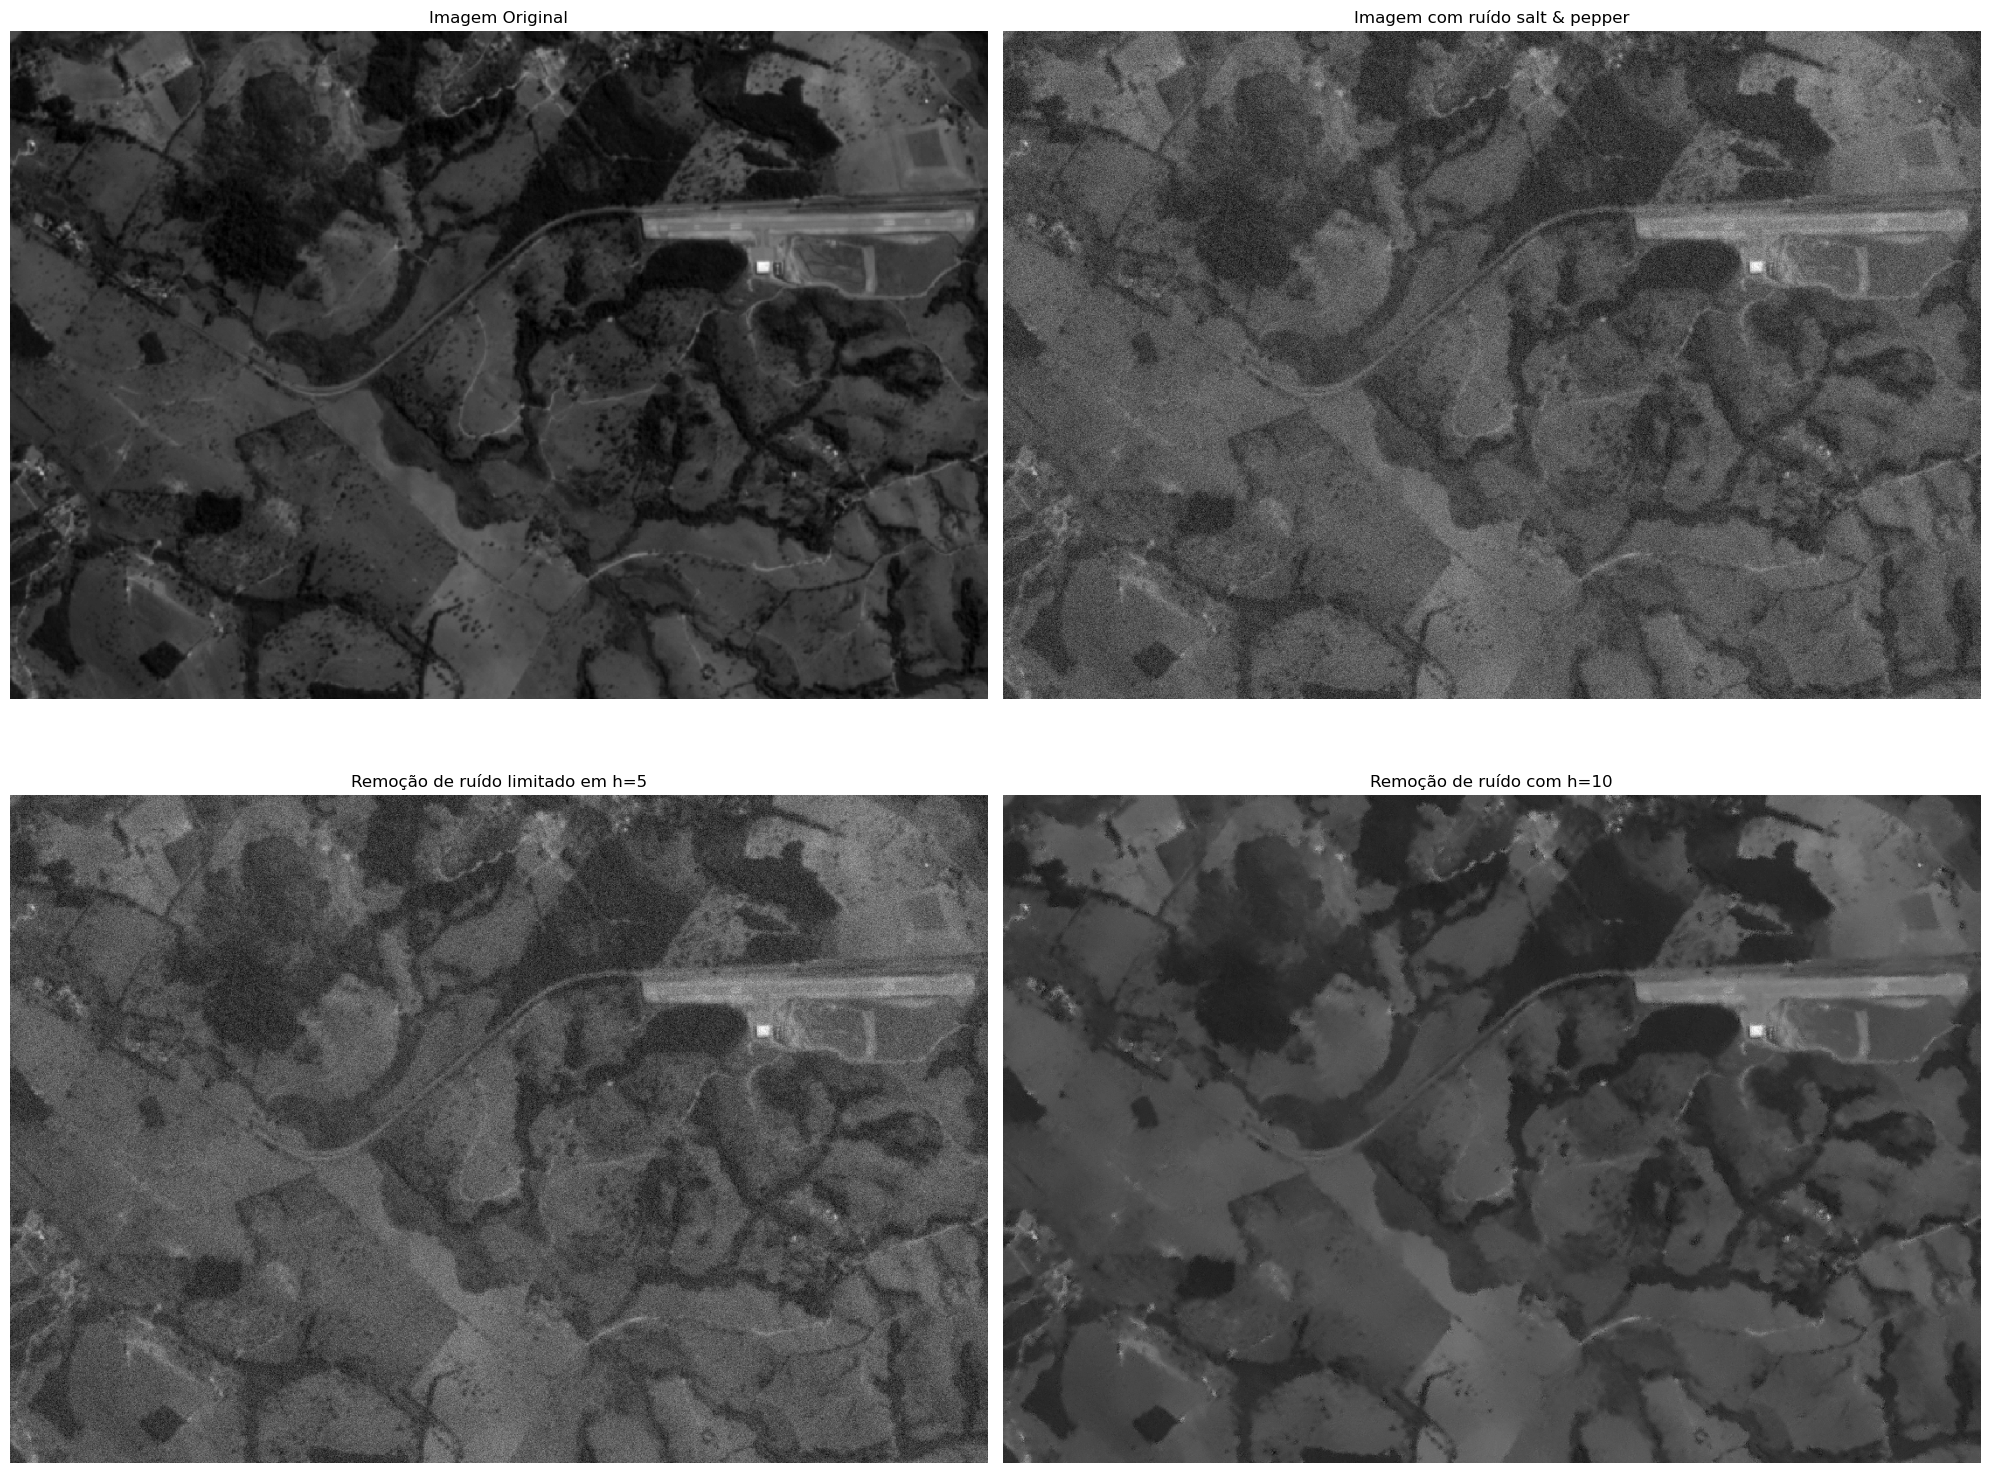

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

for ax_row in axes:
    for ax in ax_row:
        ax.axis('off')

axes[0,0].imshow(airport_gray, cmap='gray')
axes[0,0].set_title("Imagem Original")

axes[0,1].imshow(airport_gray_noisy, cmap='gray')
axes[0,1].set_title("Imagem com ruído salt & pepper")

axes[1,0].imshow(denoised_airport, cmap='gray')
axes[1,0].set_title("Remoção de ruído limitado em h=5")

denoised_airport_h10 = cv2.fastNlMeansDenoising(airport_gray_noisy, None, 10, 7, 31)
axes[1,1].imshow(denoised_airport_h10, cmap='gray')
axes[1,1].set_title("Remoção de ruído com h=10")

plt.tight_layout()
plt.show()

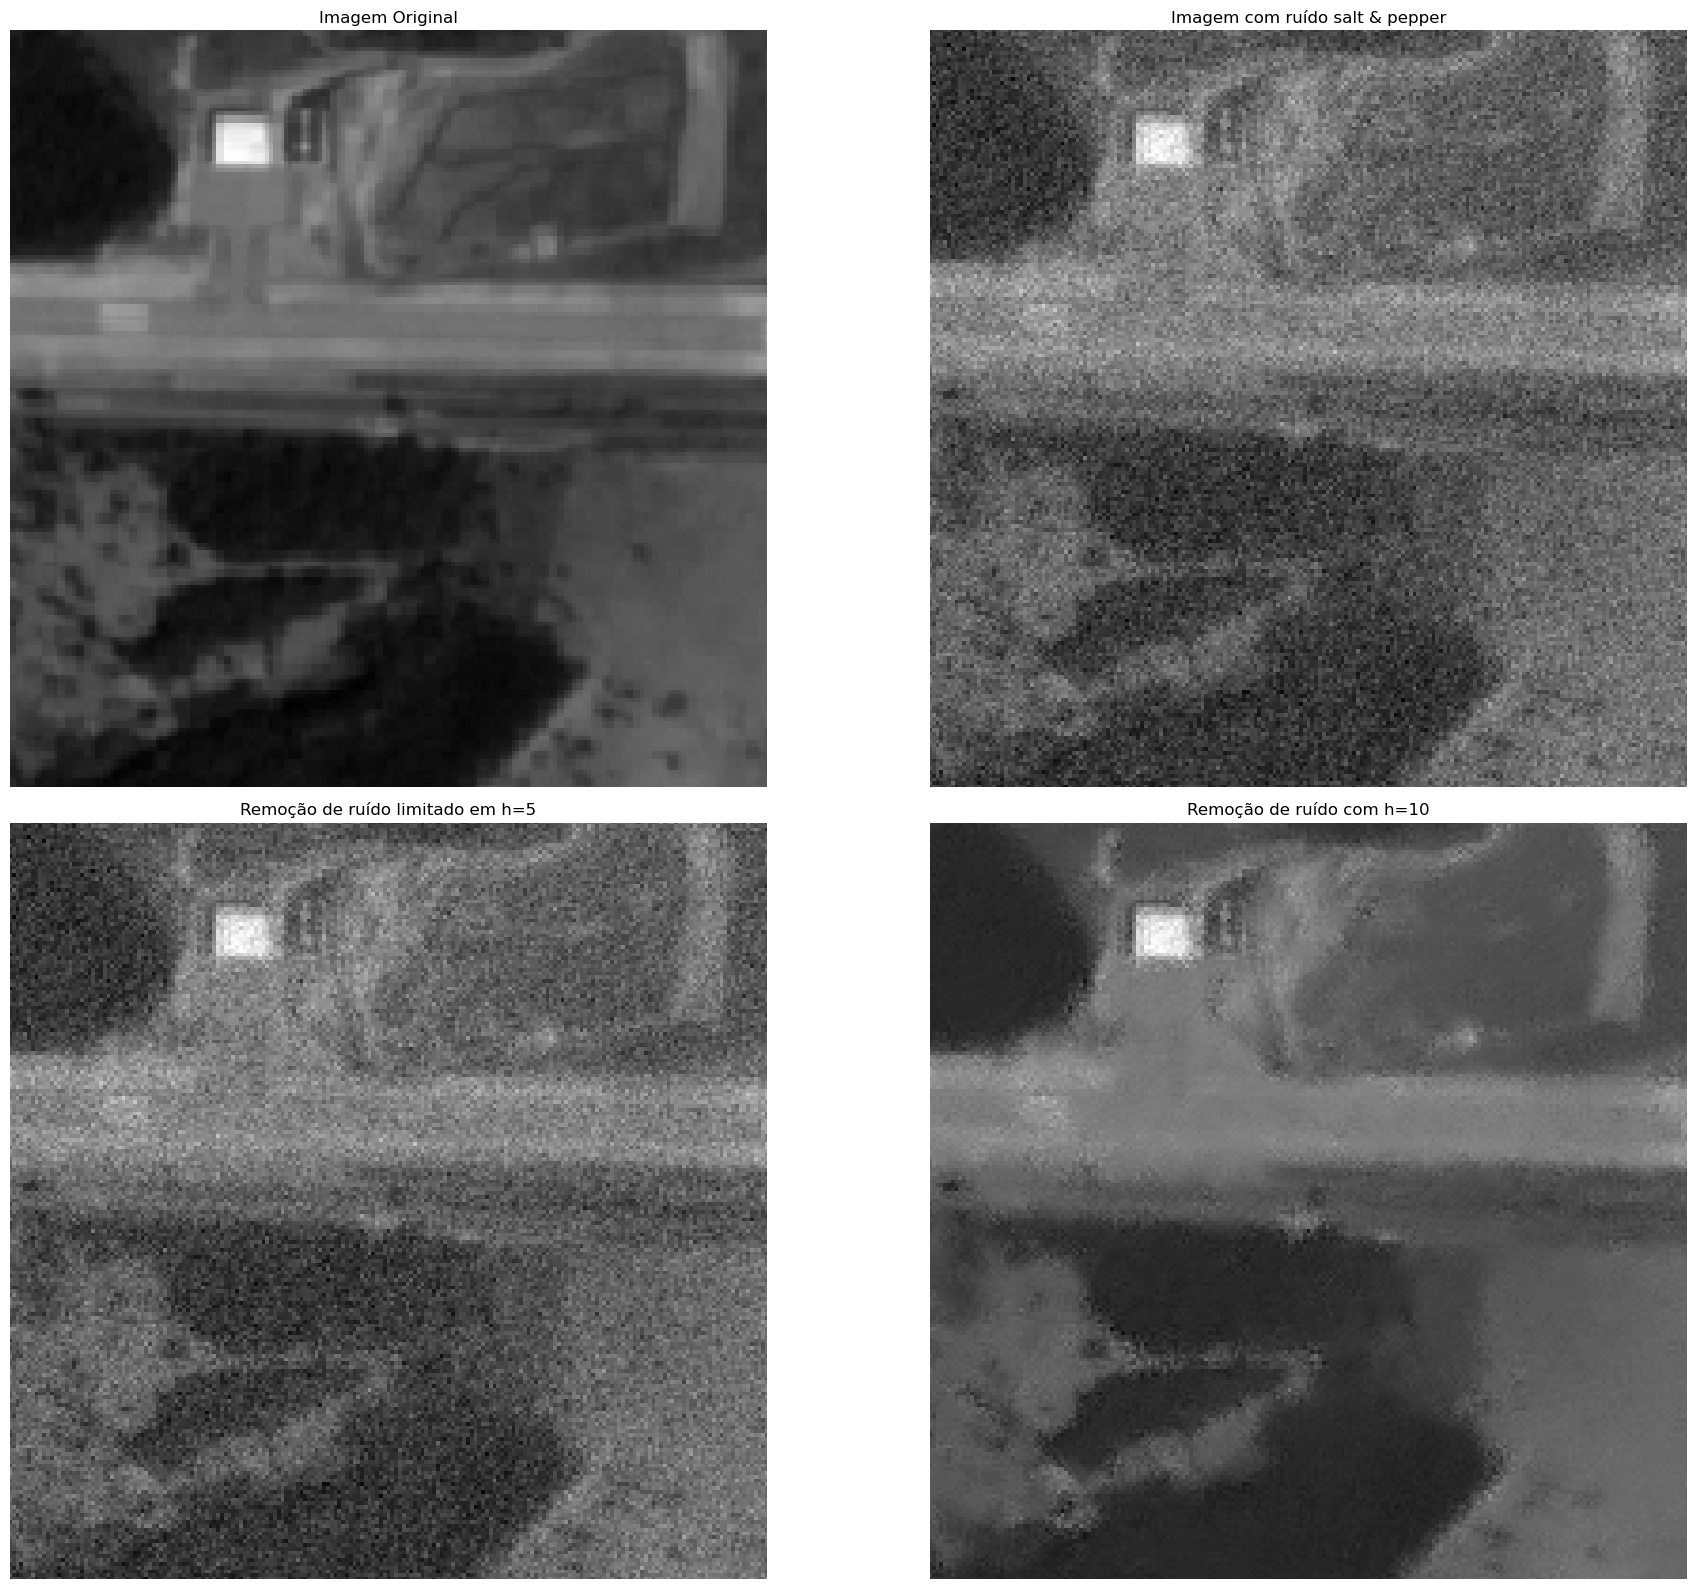

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Zoom in
xlim = [800, 1000]
ylim = [100, 300]

for ax_row in axes:
    for ax in ax_row:
        ax.axis('off')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

axes[0,0].imshow(airport_gray, cmap='gray')
axes[0,0].set_title("Imagem Original")

axes[0,1].imshow(airport_gray_noisy, cmap='gray')
axes[0,1].set_title("Imagem com ruído salt & pepper")

axes[1,0].imshow(denoised_airport, cmap='gray')
axes[1,0].set_title("Remoção de ruído limitado em h=5")

denoised_airport_h10 = cv2.fastNlMeansDenoising(airport_gray_noisy, None, 10, 7, 31)
axes[1,1].imshow(denoised_airport_h10, cmap='gray')
axes[1,1].set_title("Remoção de ruído com h=10")

plt.tight_layout()
plt.show()